In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import imutils

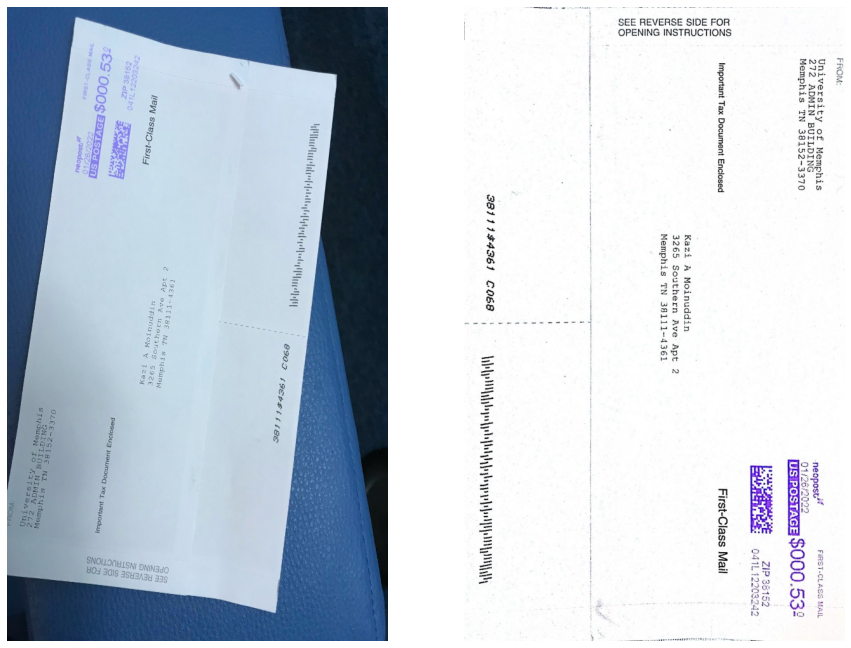

In [2]:
img = cv2.imread('image.jpg')
template = cv2.imread('template.jpg')

img = cv2.resize(img, (600, 1000))
template = cv2.resize(template, (600, 1000))

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(template)
plt.axis('off')

plt.show()

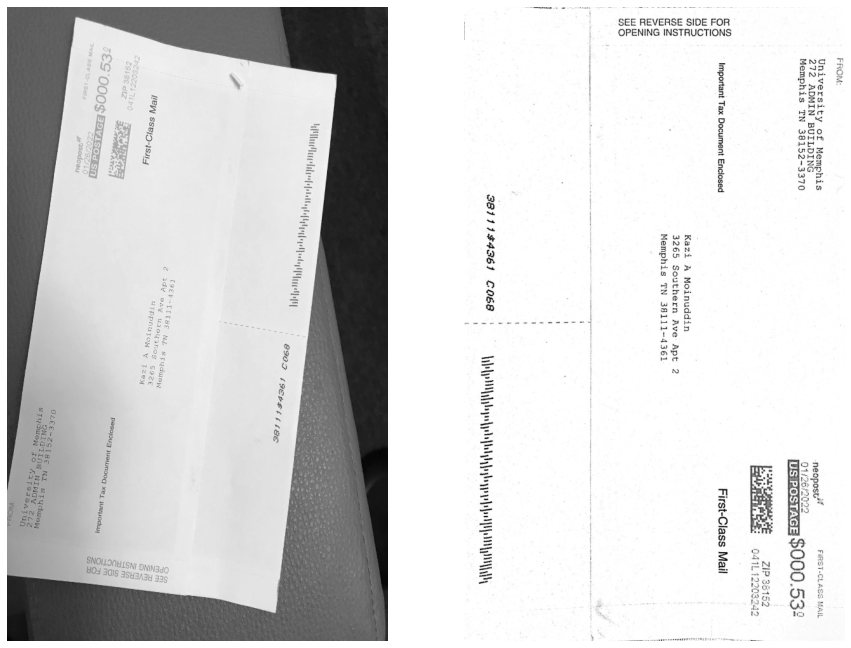

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(template_gray, cmap='gray')
plt.axis('off')

plt.show()

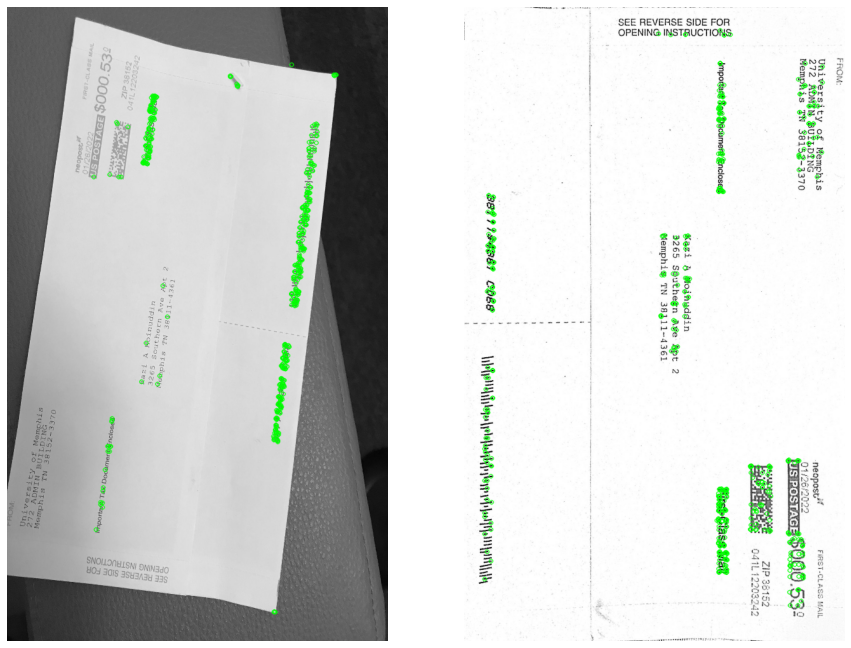

In [4]:
MAX_FEATURES = 500

# use ORB to detect keypoints and extract (binary) local invariant features
orb = cv2.ORB_create(MAX_FEATURES)
(kpsA, descsA) = orb.detectAndCompute(img_gray, None)
(kpsB, descsB) = orb.detectAndCompute(template_gray, None)

img2 = cv2.drawKeypoints(img_gray, kpsA, None, color=(0,255,0), flags=0)
template2 = cv2.drawKeypoints(template_gray, kpsB, None, color=(0,255,0), flags=0)


plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(template2, cmap='gray')
plt.axis('off')

plt.show()

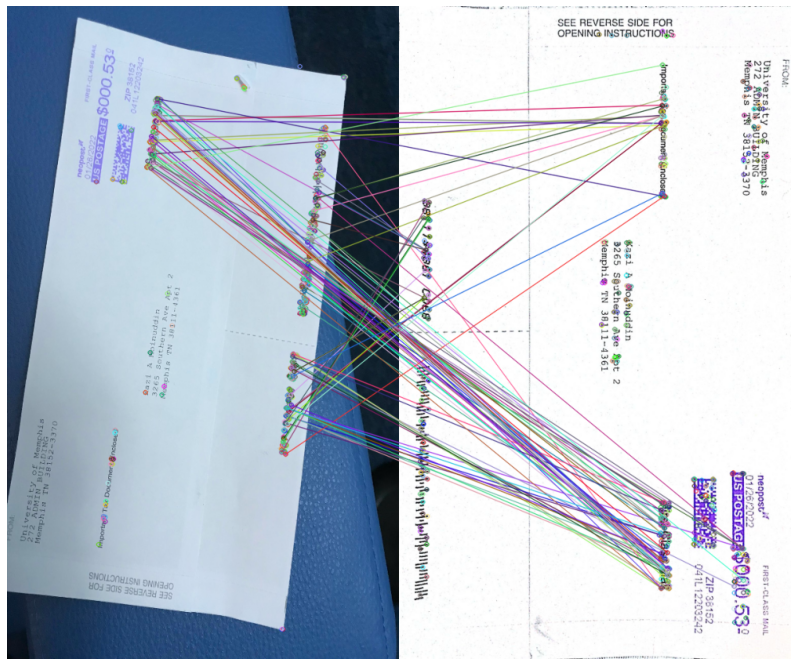

In [5]:
KEEP = 0.2


# match the features
method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
matcher = cv2.DescriptorMatcher_create(method)
matches = matcher.match(descsA, descsB, None)

# sort the matches by their distance (the smaller the distance, the "more similar" the features are)
matches = sorted(matches, key=lambda x:x.distance)
# keep only the top matches
keep = int(len(matches) * KEEP)
matches = matches[:keep]
# check to see if we should visualize the matched keypoints

matchedVis = cv2.drawMatches(img, kpsA, template, kpsB, matches, None)
matchedVis = imutils.resize(matchedVis, width=1000)


plt.figure(figsize=(15, 12))

plt.imshow(matchedVis)
plt.axis('off')
plt.show()

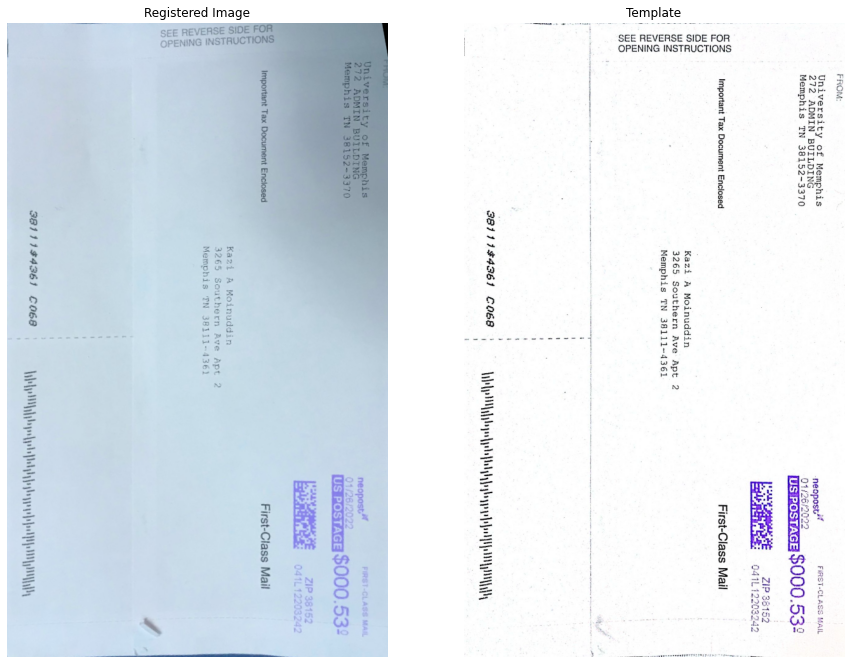

In [6]:
# allocate memory for the keypoints (x, y)-coordinates from the top matches 
# we'll use these coordinates to compute our homography matrix
ptsA = np.zeros((len(matches), 2), dtype="float")
ptsB = np.zeros((len(matches), 2), dtype="float")
# loop over the top matches
for (i, m) in enumerate(matches):
# indicate that the two keypoints in the respective images map to each other
    ptsA[i] = kpsA[m.queryIdx].pt
    ptsB[i] = kpsB[m.trainIdx].pt
    
# compute the homography matrix between the two sets of matched points
(H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)
# use the homography matrix to align the images
(h, w) = template.shape[:2]
aligned = cv2.warpPerspective(img, H, (w, h))

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.title('Registered Image')
plt.imshow(aligned, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Template')
plt.imshow(template, cmap='gray')
plt.axis('off')

plt.show()